In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "C:/Users/siddh/Downloads/Projects/My work/New York Taxi Fare Prediction/"
train_df = pd.read_csv(file_path + "train.csv", nrows = 200000)

In [3]:
test_df = pd.read_csv(file_path + "test.csv")

In [4]:
train_df.shape, test_df.shape

((200000, 8), (9914, 7))

In [4]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
#8 columns which consist of the unique key

In [6]:
(train_df.isnull().sum().sort_index()/len(train_df))*100 

dropoff_latitude     0.0005
dropoff_longitude    0.0005
fare_amount          0.0000
key                  0.0000
passenger_count      0.0000
pickup_datetime      0.0000
pickup_latitude      0.0000
pickup_longitude     0.0000
dtype: float64

In [ ]:
#Since less than 1% of data is missing we can erase the  

In [7]:
train_df.dropna()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
199995,2011-03-24 01:38:50.0000002,8.90,2011-03-24 01:38:50 UTC,-73.989939,40.729423,-73.990683,40.758504,1
199996,2012-06-20 21:36:56.0000004,14.10,2012-06-20 21:36:56 UTC,-74.005021,40.739912,-73.961319,40.766701,3
199997,2012-08-04 19:18:00.000000219,6.90,2012-08-04 19:18:00 UTC,-73.993203,40.752092,-74.003508,40.732282,1
199998,2013-11-26 18:59:21.0000002,18.00,2013-11-26 18:59:21 UTC,-73.994411,40.750884,-73.978532,40.785599,1


In [8]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


Text(0.5, 1.0, 'Distribution of Trip Fare')

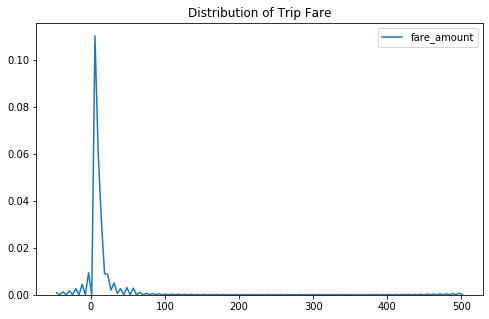

In [10]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(train_df['fare_amount']).set_title("Distribution of Trip Fare")


In [ ]:
# our data is skewed and contains negative values. Looking at the negative data points

In [11]:
train_df[train_df['fare_amount'] < 0 ].shape

(13, 8)

In [12]:
# there aren't a lot of values that have negative fare. We can remove this variable
train_df  = train_df[train_df['fare_amount'] > 0 ]
train_df.shape

(199982, 8)

Text(0.5, 1.0, 'Log (Distribution of fare amount)')

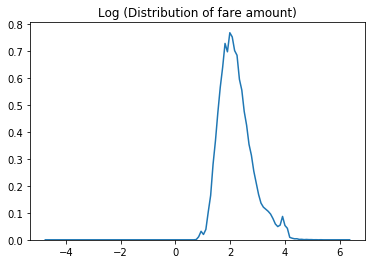

In [13]:
# our data for the fare_amount is skewed. Taking log transformation to see the distribution

sns.kdeplot(np.log(train_df['fare_amount'].values)).set_title("Log (Distribution of fare amount)")

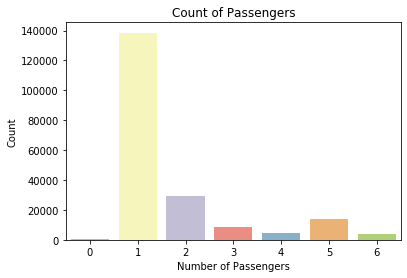

In [14]:
passenger_count = train_df.groupby(['passenger_count']).count()

sns.barplot(passenger_count.index, passenger_count['key'], palette = "Set3")

plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

In [15]:
# we will remove the rides without any passengess
train_df = train_df[(train_df['passenger_count'] > 0)]

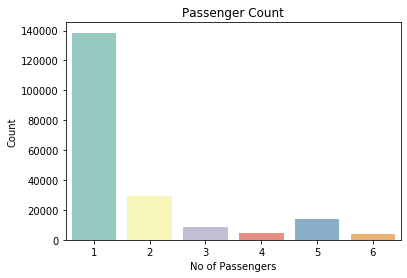

In [16]:
passenger = train_df.groupby(['passenger_count']).count()

sns.barplot(passenger.index, passenger['key'], palette = "Set3")

plt.xlabel('No of Passengers')
plt.ylabel('Count')
plt.title('Passenger Count')
plt.show()

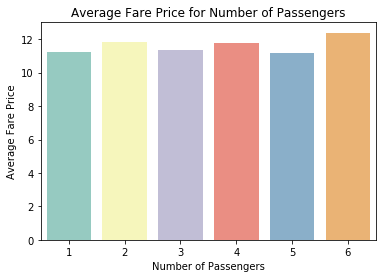

In [17]:
passenger_fare = train_df.groupby(['passenger_count']).mean()

sns.barplot(passenger_fare.index, passenger_fare['fare_amount'], palette = "Set3")

plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

Text(0.5, 1.0, 'Distribution of Trip Fare')

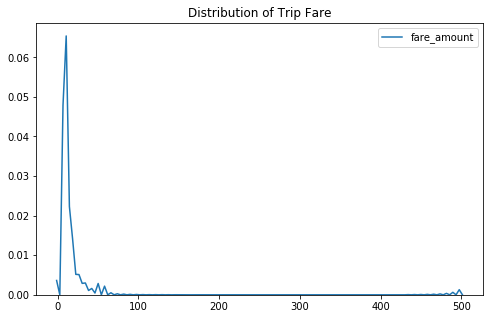

In [18]:
plt.figure(figsize=(8,5))
sns.kdeplot(train_df['fare_amount']).set_title("Distribution of Trip Fare")


In [19]:
import datetime
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime']) - datetime.timedelta(hours = 4)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199268 entries, 0 to 199999
Data columns (total 8 columns):
key                  199268 non-null object
fare_amount          199268 non-null float64
pickup_datetime      199268 non-null datetime64[ns, UTC]
pickup_longitude     199268 non-null float64
pickup_latitude      199268 non-null float64
dropoff_longitude    199268 non-null float64
dropoff_latitude     199268 non-null float64
passenger_count      199268 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.7+ MB


In [20]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime']) - datetime.timedelta(hours = 4)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [21]:
train_df['Year'] = train_df['pickup_datetime'].dt.year
train_df['Month'] = train_df['pickup_datetime'].dt.month
train_df['Day'] = train_df['pickup_datetime'].dt.day
train_df['Hour'] = train_df['pickup_datetime'].dt.hour
train_df['Minutes'] = train_df['pickup_datetime'].dt.minute

In [22]:
test_df['Year'] = test_df['pickup_datetime'].dt.year
test_df['Month'] = test_df['pickup_datetime'].dt.month
test_df['Day'] = test_df['pickup_datetime'].dt.day
test_df['Hour'] = test_df['pickup_datetime'].dt.hour
test_df['Minutes'] = test_df['pickup_datetime'].dt.minute

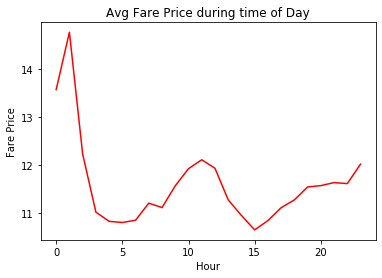

In [23]:
time_of_day = train_df.groupby(['Hour']).mean()

plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')

plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Avg Fare Price during time of Day')
plt.show()

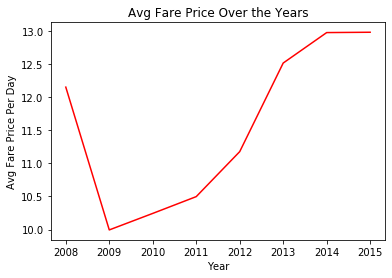

In [27]:
taxi_rate = train_df.groupby(['Year']).mean()

plt.plot(taxi_rate.index, taxi_rate.fare_amount, color = 'r')

plt.xlabel('Year')
plt.ylabel('Avg Fare Price Per Day')
plt.title('Avg Fare Price Over the Years')
plt.show()

In [24]:
train_df.drop(train_df[train_df['pickup_longitude'] == 0].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['pickup_latitude'] == 0].index, axis=0, inplace = True)

train_df.drop(train_df[train_df['dropoff_longitude'] == 0].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['dropoff_latitude'] == 0].index, axis=0, inplace = True)

In [25]:
#find the range for the lattitude and longitude for pickup
print("Range of Pickup Latitude is ", (min(train_df['pickup_latitude']),max(train_df['pickup_latitude'])))

print("Range of Dropoff Latitude is ", (min(train_df['dropoff_latitude']),max(train_df['dropoff_latitude'])))

Range of Pickup Latitude is  (-74.00766999999999, 1703.092772)
Range of Dropoff Latitude is  (-1189.61544, 404.616667)


In [26]:
#find the range for the lattitude and longitude for pickup
print("Range of Pickup Longitude is ", (min(train_df['pickup_longitude']),max(train_df['pickup_longitude'])))

print("Range of Dropoff longitude is ", (min(train_df['dropoff_longitude']),max(train_df['dropoff_longitude'])))

Range of Pickup Longitude is  (-736.55, 2140.60116)
Range of Dropoff longitude is  (-1251.19589, 40.851027)


In [ ]:
# New York city longitude ranges between -75 and -72. The latitude ranges between 40 and 42.

In [27]:
train_df.dropna(inplace=True)

train_df.drop(train_df.index[(train_df.pickup_longitude < -75) | 
           (train_df.pickup_longitude > -72) | 
           (train_df.pickup_latitude < 40) | 
           (train_df.pickup_latitude > 42)],inplace=True)
train_df.drop(train_df.index[(train_df.dropoff_longitude < -75) | 
           (train_df.dropoff_longitude > -72) | 
           (train_df.dropoff_latitude < 40) | 
           (train_df.dropoff_latitude > 42)],inplace=True)

In [28]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51


In [ ]:
#creating a categorical feature for the part of the day. Day or night

In [29]:
train_df['morning_or_night'] = np.where(train_df['Hour'] < 12, 0, 1)

In [30]:
train_df.drop('pickup_datetime', axis = 1 , inplace =  True)

In [31]:
from math import radians, cos, sin, asin, sqrt

def haversine(df):
    """
    Calculate the great circle distance between two points on the earth """
    
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [32]:
train_df['Total_Distance'] = haversine(train_df)

In [33]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes,morning_or_night,Total_Distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35,1,1.389525
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30,0,2.799270
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51,0,1.999157


In [34]:
train_df_new = train_df.drop(["key", "pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1)

In [35]:
train_df_new.shape

(195136, 9)

Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

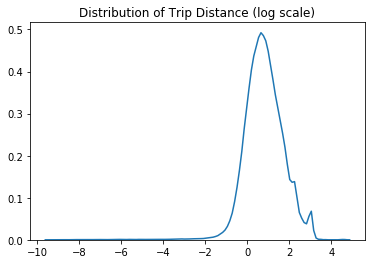

In [36]:
# checking the dsitribution for Total_Distance 

sns.kdeplot(np.log(train_df_new['Total_Distance'].values)).set_title("Distribution of Trip Distance (log scale)")

In [37]:
train_df_new.describe()

,fare_amount,passenger_count,Year,Month,Day,Hour,Minutes,morning_or_night,Total_Distance
count,195136.000000,195136.000000,195136.000000,195136.000000,195136.000000,195136.000000,195136.000000,195136.000000,195136.000000
mean,11.336465,1.688627,2011.739023,6.278047,15.685686,12.041361,29.559707,0.539183,3.335676
std,9.768949,1.305101,1.867504,3.445757,8.673909,5.832829,17.306358,0.498464,3.831418
min,0.010000,1.000000,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,2010.000000,3.000000,8.000000,7.000000,15.000000,0.000000,1.256430
50%,8.500000,1.000000,2012.000000,6.000000,16.000000,12.000000,30.000000,1.000000,2.154992
75%,12.500000,2.000000,2013.000000,9.000000,23.000000,17.000000,45.000000,1.000000,3.909141
max,500.000000,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,1.000000,104.034965


In [38]:
train_df_new = train_df_new[train_df_new['Total_Distance'] > 0]

In [39]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193016 entries, 0 to 199999
Data columns (total 9 columns):
fare_amount         193016 non-null float64
passenger_count     193016 non-null int64
Year                193016 non-null int64
Month               193016 non-null int64
Day                 193016 non-null int64
Hour                193016 non-null int64
Minutes             193016 non-null int64
morning_or_night    193016 non-null int32
Total_Distance      193016 non-null float64
dtypes: float64(2), int32(1), int64(6)
memory usage: 14.0 MB


In [ ]:
#modeling

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X= train_df_new.drop('fare_amount', axis = 1)
y = train_df_new['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
#feature importance

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

<function matplotlib.pyplot.show(*args, **kw)>

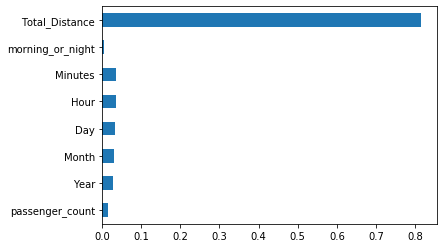

In [43]:
#plot of the important features
feature_imp = pd.Series(etr.feature_importances_  , index = X.columns)
feature_imp.plot(kind = 'barh')
plt.show

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = np.round(lr.predict(X_test),2)

lr_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lr_train_rmse=np.sqrt(mean_squared_error(lr.predict(X_train), y_train))
lr_variance=abs(lr_train_rmse - lr_rmse)

print("Test RMSE for Linear Regression is ",lr_rmse)
print("Train RMSE for Linear Regression is ",lr_train_rmse)
print("Variance for Linear Regression is ",lr_variance)


Test RMSE for Linear Regression is  5.493962920575831
Train RMSE for Linear Regression is  5.470487239104129
Variance for Linear Regression is  0.023475681471702536


In [ ]:
#random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 1,n_jobs=-1)
rf_model.fit(X_train,y_train)


rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(rf_pred, y_test))
print("RMSE: ",rf_rmse)

RMSE:  4.420715777297731


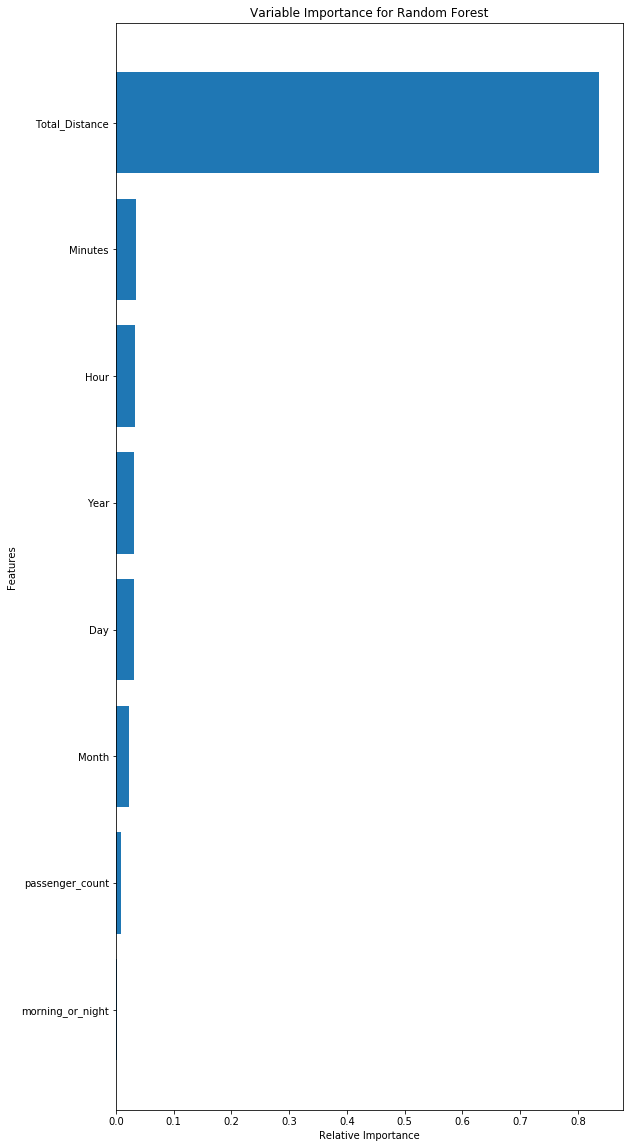

In [61]:
feat_imp = rf_model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feat_imp / feat_imp.max())
sorted_idx = np.argsort(feat_imp)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feat_imp[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Variable Importance for Random Forest')
plt.show()

In [ ]:
#XGBoost

In [45]:
import xgboost
xg_model = xgboost.XGBRegressor()
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred_xg = xg_model.predict(X_test)

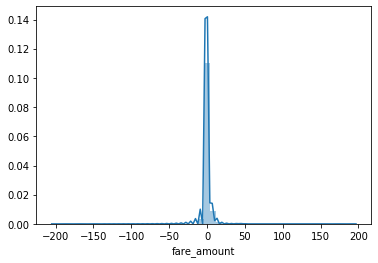

In [47]:
sns.distplot(y_test - y_pred) 

In [48]:
from sklearn import metrics

print('R Sqaure:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Sqaure: 0.8225215238933531
MAE: 2.4133313185389857
MSE: 30.183628572662116
RMSE: 5.493962920575831


In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#Randomized Search CV

# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

# Maximum number of levels
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [51]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [52]:
xg_random_model = RandomizedSearchCV(estimator = xg_model, param_distributions = random_grid,scoring='neg_mean_squared_error',
                                     n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [53]:
xg_random_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 4.4min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 4.0min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 4.1min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 4.4min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 4.5min
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=30, learning_rate=0.5, total= 1.9min
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=30, learning_rate=0.5 
[

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 49.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [54]:
xg_random_model.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [55]:
y_pred = xg_random_model.predict(X_test)

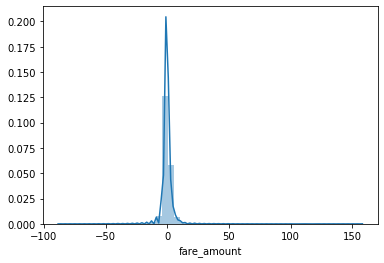

In [56]:
sns.distplot(y_test-y_pred)

In [57]:
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.8814528982181971
MAE: 2.2786683183498884
MSE: 20.813129293263156
RMSE: 4.562140867319109


In [ ]:
#Artifical Neural network

In [62]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [63]:
ann_model = Sequential()


# The Input Layer :
ann_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


# The Hidden Layers :
ann_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ann_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ann_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


# The Output Layer :
ann_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


# Compile the network :
ann_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
ann_model.summary()


# Fitting the ANN to the Training set
model_history=ann_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9053/9053 [==============================] - 19s 2ms/step - loss: 2.8655 - mean_absolute_error: 2.8655 - 

In [64]:
prediction=ann_model.predict(X_test)

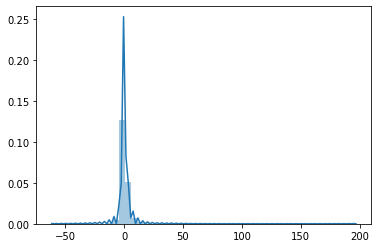

In [65]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.2204008759968885
MSE: 22.18831131312558
RMSE: 4.710447039626449
